In [10]:
import math
import random
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import itertools
from sympy import symbols, diff, simplify, sin, cos, log, tan, sqrt, init_printing
from mpmath import ln, e

In [11]:
name = ('/Users/frankisaacson/Desktop/Research/2018-2019/Data Sources')
DATA_PATH = os.path.join(name)
#this is the path to data files(On a macbook), enabling them
#to be opened later

In [13]:
with open(DATA_PATH + '/contactdata.dat', 'r') as input_file:
    lines = input_file.readlines(500000000,1000000000)
    '''
This makes the file size significantly smaller that the 1 e 9 bytes of file size previously, in order to maintain
speed, several different trials of 1 e 6 bytes will be run
'''
    contactData = []
#at this amount of bytes, roughly main people are simulated
#Opening a blank list for the data to be placed
for line in lines:
    newLine = line.strip().split(' ')
#This splits the lines at the spaces and at each line
    contactData.append(newLine)
with open('contactdata.csv', "w") as f:
    writer = csv.writer(f)
    writer.writerows(contactData)
#The first line gives a person's id in the first column
#and the number of contacts that person has in the second column.
#For each of those contacts, there follows one line 
#(indented by a tab character) with a person's id, the number
#of hours (out of 24) of contact, and the activity type
#for the contact. Note that two people may be connected by 
#more than one edge if they share several activity types

In [14]:
with open('contactdata.csv', "r") as d:
    reader = csv.reader(d)
    with open('contactdata2.csv', 'w') as csvoutput: 
        writer = csv.writer(csvoutput)
        writer.writerow(['Main Person ID Contacted', 'Main Person # of Contacts', 'Contact Person ID', 'Hours of Contacted', 'Activity Type'])
        for row in reader:
            if len(row) == 2:
                x = int(row[0])
                y = int(row[1])
            elif len(row) == 3:
                writer.writerow([x]+[y]+row)
#this associates the main person people come in contact with with those people, adding the main persons id in each row


In [15]:
df = pd.read_csv('contactdata2.csv')

In [17]:
t = df['Hours of Contacted']
p = df['Main Person ID Contacted']
cp = df['Contact Person ID']
at = df['Activity Type']
cn = df['Main Person # of Contacts']
df.tail()


,Main Person ID Contacted,Main Person # of Contacts,Contact Person ID,Hours of Contacted,Activity Type
29674098,732271,17,730192,0.083056,4
29674099,732271,17,731983,0.500000,4
29674100,732271,17,762315,0.833333,4
29674101,732271,17,766795,1.066390,4
29674102,732271,17,805507,0.283333,4


In [6]:
infected_people = []
recovering_people = []
recovered_date = []
recovered_population = []
sick_population = []
date = []
probability = []
graph_days = []
x = []
infected_rows = []
def probability_function(r,time):
    return (.1/(1+(math.exp((-1/(2*r))*(time-12)))))
day = 0
r = random.uniform(1.4, 1.6)
#this is the R nought value that determines the severity of the outbreak
print('r nought value: '+ str(r))
rd = p.sample(n = 1)
infected_people.append(int(rd))
print('Patient Zero: ' + str(int(rd)))
print('People Infected: ' + str(len(infected_people)))
for i in infected_people:
    date.append(day)
sick_population.append(len(infected_people))
recovered_population.append(len(recovering_people))
#this is the first person infected, randomly selected each trial

r nought value: 1.490522318068874
Patient Zero: 1489169
People Infected: 1


1
67
[680401]
Influenza A has infected 1 people 1 day after patient zero


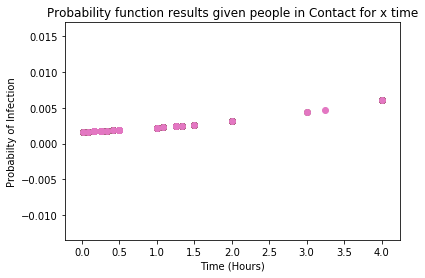

In [5]:
index = df.index[p == int(rd)]
z = 0
for i in index:
    a = index[z]
#through using index, row numbers are assumed for each person the first infected person comes in contact with
    b = len(index)
    time = t[a]
    q = probability_function(r,time)
#.99 is the maximum value, the equation in reality looks like this (.99/(1+e^((-1/2r)*time-12)))
    probability.append(q)
    x.append(time)
    my_plot1 = plt.scatter(x, probability)
    plt.xlabel('Time (Hours)')
    plt.ylabel('Probabilty of Infection')
    plt.title('Probability function results given people in Contact for x time')
#this equation creates a probability someone will get infected given they came in contact with the original person
    ru = random.uniform(0.0000000,1.0000000)
#the random.uniform is used to maintain the unpredictable nature of transferring disease
    if ru <= q:
        if cp[a] in infected_people:
            continue
        else:
            infected_people.append(cp[a])
#this uses the random seed to actually make the ultimate decision using probabilities selected earlier
    z+=1
#the z value makes sure the index is fully iterated through, increasing by one value each loop until there are no more index values
print(len(infected_people))
print(b)
print(infected_people)
day = 1
for i in infected_people:
    date.append(day)
print('Influenza A has infected '+ str(len(infected_people))+' people ' + str(day) + ' day after patient zero')
sick_population.append(len(infected_people))
recovered_population.append(len(recovering_people))
#please work
plt.show()

In [6]:
import time
total_start_time = time.time()
while len(infected_people) != 0:
    dfp = pd.DataFrame({'Infected people': infected_people})
    d = pd.DataFrame({'Date of Infection':date})
    start_time = time.time()
    count = 0
    length = len(dfp)
    count2 = 0
    for row in dfp.iterrows():
        g = day-date[count2]
        e = random.randint(5,8)
        if g > e:
            recovering_people.append(infected_people[count2])
            recovered_date.append(day)
            del infected_people[count2]
            del date[count2]
        row = int(dfp.loc[count])
#dfp is the infected people dataframe, this is placing their values at different count values into a variable
        index1 = df.index[p == row]
#this is my attempt to find the rows of the infected people in the original contact data
        k = index1.tolist()
#this changes the index into a list that can be 
        infected_rows.append(k)
        c = len(index1)
        count+=1
        if len(date) == len(infected_people):
            count2+=1
        else:
            date.append(day)
    index_list = list(itertools.chain.from_iterable(infected_rows))
#this is a list of all the row numbers of the infected people
    count1 = 0
    for i in index_list:
#this was utilized because several empty indexes appeared from the index1 variable
        d = index_list[count1]
#d is storing the value of index1 at count1
        time1 = t[d]
        count1+=1
#the row values obtained within index one are accessed for the time value in that row, for use in my equation
        q = probability_function(r,time1)
        ru = random.uniform(0,1)
#ru creates a value for which will be used to utilize th previous probability while maintaining the inherent randomness
        if ru <= q:
#this executes the ru value and probability
            if cp[d] in infected_people:
                continue
            elif cp[d] in recovering_people:
                continue
            else:
                infected_people.append(cp[d])
                date.append(day)
#cp[d] is a dataframe consisting of a portion of the contactdata, specifically the people the "main people" came in
#contact with, and infecting them if the probability allows
    sick_pop = len(infected_people)
    recovered_population.append(len(recovering_people))
    graph_days.append(day-1)
    day +=1
    sick_population.append(sick_pop)
    print('Influenza A has infected '+ str(len(infected_people))+' people '+ str(day) + ' days after patient zero')
    print("--- %s seconds ---" % (time.time() - start_time))
    print(len(recovering_people))
    print('_______________________________________________________')



Influenza A has infected 1 people 2 days after patient zero
--- 0.0620000362396 seconds ---
0
_______________________________________________________
Influenza A has infected 1 people 3 days after patient zero
--- 0.0589997768402 seconds ---
0
_______________________________________________________
Influenza A has infected 1 people 4 days after patient zero
--- 0.0590000152588 seconds ---
0
_______________________________________________________
Influenza A has infected 1 people 5 days after patient zero
--- 0.0679998397827 seconds ---
0
_______________________________________________________
Influenza A has infected 2 people 6 days after patient zero
--- 0.066999912262 seconds ---
0
_______________________________________________________
Influenza A has infected 3 people 7 days after patient zero
--- 0.116999864578 seconds ---
0
_______________________________________________________
Influenza A has infected 4 people 8 days after patient zero
--- 0.178999900818 seconds ---
0
_________

Influenza A has infected 6592 people 56 days after patient zero
--- 11548.316 seconds ---
1397448
_______________________________________________________
Influenza A has infected 6025 people 57 days after patient zero
--- 11408.513 seconds ---
1404040
_______________________________________________________
Influenza A has infected 5475 people 58 days after patient zero
--- 11376.553 seconds ---
1410065
_______________________________________________________
Influenza A has infected 4952 people 59 days after patient zero
--- 11507.4289999 seconds ---
1415540
_______________________________________________________
Influenza A has infected 4498 people 60 days after patient zero
--- 11472.6200001 seconds ---
1420492
_______________________________________________________
Influenza A has infected 4074 people 61 days after patient zero
--- 11449.7749999 seconds ---
1424990
_______________________________________________________
Influenza A has infected 3788 people 62 days after patient zero


KeyboardInterrupt: 

Text(0.5, 1.0, 'Probability Function Results as Time of Contact Increases')

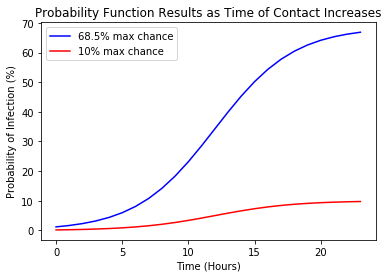

In [9]:
def old_prob(r,time):
    return (.685/(1+(math.exp((-1/(2*r))*(time-12)))))
graph = []
graph2 = []
hours = []
hour = 0
for time in range(0,24):
    rt = (probability_function(r,time))*100
    rg = (old_prob(r,time))*100
    graph2.append(rg)
    graph.append(rt)
    hours.append(hour)
    hour+=1
plot2 = plt.plot(hours, graph2, linestyle = '-', color = 'blue', label = '68.5% max chance')
my_plot1 = plt.plot(hours, graph, linestyle = '-', color = 'red', label = '10% max chance')

legend = plt.legend(loc = 'best')
x_axis = plt.xlabel('Time (Hours)')
y_axis = plt.ylabel('Probability of Infection (%)')
plt.title('Probability Function Results as Time of Contact Increases')

293 people infected
75 days after patient zero
[1, 1, 1, 1, 1, 1, 2, 3, 4, 3, 4, 8, 18, 26, 35, 53, 79, 127, 178, 284, 445, 689, 1028, 1551, 2275, 3333, 4949, 7200, 10691, 15894, 23625, 35204, 52139, 76612, 110230, 155046, 211137, 275711, 339837, 388060, 424265, 428492, 389054, 294533, 215461, 108346, 67081, 30515, 23249, 18984, 15297, 13065, 11144, 9532, 8467, 7437, 6592, 6025, 5475, 4952, 4498, 4074, 3788, 3600, 3269, 3035, 2890, 2652, 2576, 2371, 2343, 2099, 1947, 1900, 1769, 1735]
76


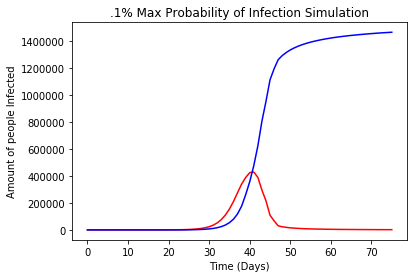

False


In [10]:
print(str(len(infected_people)) + ' people infected')
print(str(day) + ' days after patient zero')
print(sick_population)
print(len(recovered_population))
h = 0
h_list = []
for i in range(0,day+1):
    h_list.append(h)
    h+=1
my_plot2 = plt.plot(h_list, sick_population, linestyle = '-', color = 'red')
my_plot3 = plt.plot(h_list, recovered_population, linestyle = '-', color = 'blue')
x_axis = plt.xlabel('Time (Days)')
y_axis = plt.ylabel('Amount of people Infected')
plt.title('.1% Max Probability of Infection Simulation')
plt.show()
print(False)
#Thomas is 678923
#Justin is 5
#Quinten is 1738
#Dylan is 169

In [1]:
def slope(x):
    return (sick_population[x]-sick_population[x+1])/(date[x]-date[x+1])
derivative = []
h = 0
g = 0
for i in range(0,22):
    derivative.append(slope(g))
    h_list.append(h)
    h+=1
    g+=1
myplot = plt.plot(h_list, derivative, linestyle = '-', color = 'red')
plt.fill_between(h_list, derivative, color = 'lightcoral')
x_axis = plt.xlabel('Time (days)')
y_axis = plt.ylabel('Rate of Infection A')
plt.title('Portland Epidemic Rate of Infection Through '+str(day)+' Days')
plt.show()

NameError: name 'sick_population' is not defined

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


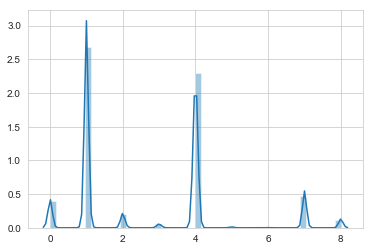

In [28]:
import seaborn as sns
from scipy import stats
sns.set_style('whitegrid')
sns.distplot(np.array(at))
#x axis represents activity type
#y axis doesnt represent anything other than relative value

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


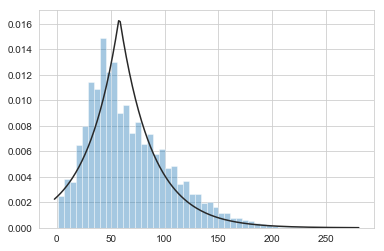

In [29]:
sns.set_style('whitegrid')
sns.distplot(np.array(cn), fit = stats.laplace, kde = False)
#x axis represents the number of contacts for a given person in the population
#y axis doesnt represent anything yet

In [174]:
print(len(date))
print(len(dfp))

63
64
